In [1]:
!git clone https://github.com/smaranjitghose/corn_pathology_ai.git

Cloning into 'corn_pathology_ai'...
remote: Enumerating objects: 5903, done.
remote: Counting objects: 100% (3/3), done.
remote: Compressing objects: 100% (2/2), done.
remote: Total 5903 (delta 0), reused 0 (delta 0), pack-reused 5900 (from 1)
Receiving objects: 100% (5903/5903), 247.94 MiB | 16.91 MiB/s, done.
Resolving deltas: 100% (41/41), done.
Updating files: 100% (4206/4206), done.


In [2]:
import os
import random
import shutil

dataPath = "/content/corn_pathology_ai/data"  # old 폴더의 경로
targetPath = "/content/corn_pathology_ai/dataset"  # new 폴더의 경로

train_ratio = 0.7  # 7:2:1 비율로 나누기 위한 변수
valid_ratio = 0.2
test_ratio = 0.1

# dataset 폴더와 그 내부의 'train', 'valid', 'test' 폴더 생성
trainPath = os.path.join(targetPath, 'train')
validPath = os.path.join(targetPath, 'valid')
testPath = os.path.join(targetPath, 'test')

os.makedirs(trainPath, exist_ok=True)
os.makedirs(validPath, exist_ok=True)
os.makedirs(testPath, exist_ok=True)

# data 폴더 안의 모든 서브 폴더 리스트
folderList = os.listdir(dataPath)

for folder in folderList:
    currentDir = os.path.join(dataPath, folder)

    # 폴더가 아닌 경우 무시
    if not os.path.isdir(currentDir):
        continue

    # 현재 서브폴더의 파일 목록 및 개수
    fileList = os.listdir(currentDir)
    dataCount = len(fileList)
    trainCount = int(dataCount * train_ratio)
    validCount = int(dataCount * valid_ratio)
    # 나머지 파일 수를 testCount로 할당 (총합이 항상 데이터 수와 같게 하기 위해)
    testCount = dataCount - trainCount - validCount

    # 파일 리스트에서 랜덤하게 선택해서 trainList, validList, testList 생성
    trainList = random.sample(fileList, trainCount)
    remainingFiles = list(set(fileList) - set(trainList))
    validList = random.sample(remainingFiles, validCount)
    testList = list(set(remainingFiles) - set(validList))

    # 'train', 'valid', 'test' 폴더 내 서브 폴더 생성
    os.makedirs(os.path.join(trainPath, folder), exist_ok=True)
    os.makedirs(os.path.join(validPath, folder), exist_ok=True)
    os.makedirs(os.path.join(testPath, folder), exist_ok=True)

    # train 파일 이동
    for trainFile in trainList:
        oldPath = os.path.join(currentDir, trainFile)
        newPath = os.path.join(trainPath, folder, trainFile)
        shutil.move(oldPath, newPath)

    # valid 파일 이동
    for validFile in validList:
        oldPath = os.path.join(currentDir, validFile)
        newPath = os.path.join(validPath, folder, validFile)
        shutil.move(oldPath, newPath)

    # test 파일 이동
    for testFile in testList:
        oldPath = os.path.join(currentDir, testFile)
        newPath = os.path.join(testPath, folder, testFile)
        shutil.move(oldPath, newPath)

print("데이터셋 분할 및 복사가 완료되었습니다.")

데이터셋 분할 및 복사가 완료되었습니다.


In [3]:
! ls corn_pathology_ai/dataset

test  train  valid


In [4]:
# 옮긴 후 이전 폴더 삭제
!rm -rf /content/corn_pathology_ai/data

In [5]:
folderList = os.listdir(trainPath)
for folder in folderList:
    currentDir = os.path.join(trainPath,folder)
    print(len(os.listdir(currentDir)))

401
802
813
914


array([[[171, 163, 174],
        [168, 160, 171],
        [165, 157, 168],
        ...,
        [ 79, 101,  89],
        [ 86, 108,  96],
        [ 96, 118, 106]],

       [[171, 163, 174],
        [170, 162, 173],
        [170, 162, 173],
        ...,
        [ 84, 106,  94],
        [ 92, 114, 102],
        [ 99, 121, 109]],

       [[165, 157, 168],
        [166, 158, 169],
        [168, 160, 171],
        ...,
        [ 88, 110,  98],
        [ 95, 117, 105],
        [ 95, 117, 105]],

       ...,

       [[102, 116, 105],
        [ 90, 104,  92],
        [ 50,  64,  52],
        ...,
        [147, 132, 140],
        [147, 130, 143],
        [145, 128, 142]],

       [[ 97, 114, 101],
        [ 66,  83,  70],
        [ 45,  62,  49],
        ...,
        [146, 131, 139],
        [147, 130, 143],
        [144, 127, 141]],

       [[ 95, 112,  99],
        [ 50,  67,  54],
        [ 47,  64,  50],
        ...,
        [146, 131, 139],
        [148, 131, 144],
        [144, 127, 141]]], dtype=uint8)
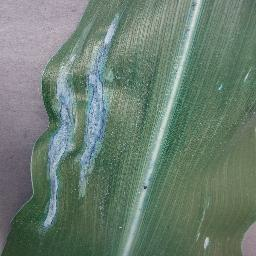

In [6]:
import cv2

train_health = os.listdir(os.path.join(trainPath,'Blight'))
img = cv2.imread(os.path.join(os.path.join(trainPath,'Blight',train_health[6])))
img

In [7]:
from torchvision import transforms

org_size =(224,224)
img_size = 224

visual_transform = transforms.Compose([
    transforms.Resize(org_size),
    transforms.RandomHorizontalFlip(),
    transforms.RandomCrop(img_size),
    transforms.ToTensor(),
    ])

train_transform = transforms.Compose([
    transforms.Resize(org_size),
    transforms.RandomHorizontalFlip(),
    transforms.RandomCrop(img_size),
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5)),
    ])

test_transform = transforms.Compose([
    transforms.Resize(org_size),
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5)),
    ])

In [8]:
from torchvision.datasets import ImageFolder
from torchvision import transforms
import os

class ImageFolderWithFilenames(ImageFolder):
    def __getitem__(self, index):
        original_tuple = super(ImageFolderWithFilenames, self).__getitem__(index)
        path, _ = self.samples[index]
        return original_tuple + (path,)

In [9]:
from torchvision.datasets import ImageFolder
from torch.utils.data import DataLoader

data_dir = '/content/corn_pathology_ai/dataset'

batch_size = 32

visual_data = ImageFolder(root=f"{data_dir}/train", transform=visual_transform)
train_data = ImageFolder(root=f"{data_dir}/train", transform=train_transform)
valid_data = ImageFolder(root=f"{data_dir}/valid", transform=train_transform)
test_data = ImageFolderWithFilenames(root=f"{data_dir}/test", transform=test_transform)


visual_loader = DataLoader(visual_data, batch_size=batch_size, shuffle=True)
train_loader = DataLoader(train_data, batch_size=batch_size, shuffle=True)
valid_loader = DataLoader(valid_data, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_data, batch_size=1, shuffle=False)

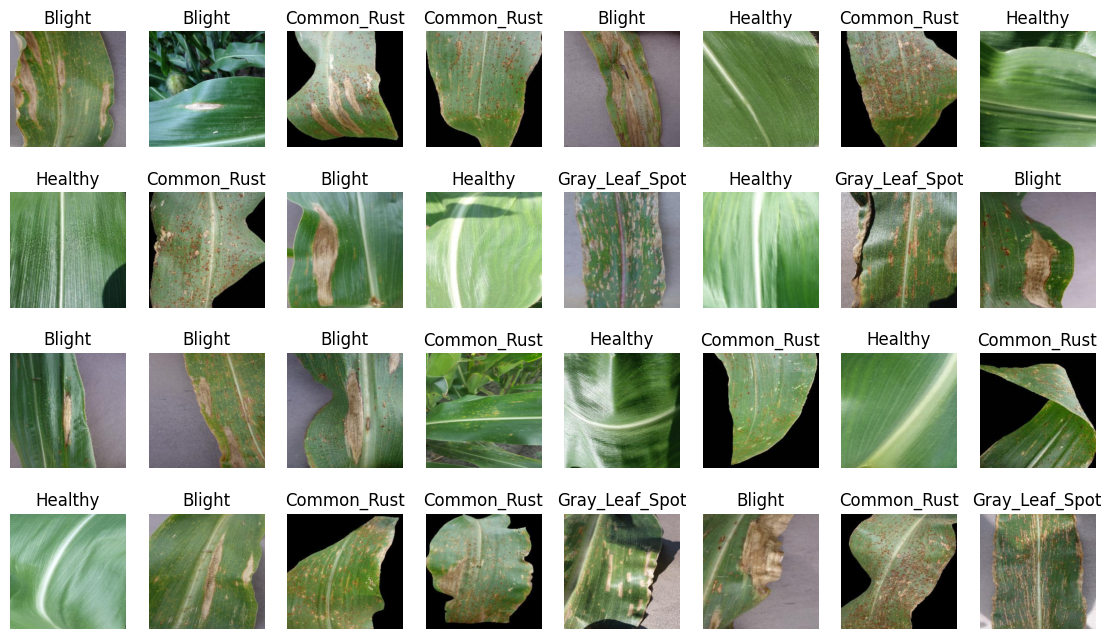

In [10]:
import matplotlib.pyplot as plt

images, labels = next(iter(visual_loader))

classes ={0:'Blight', 1:'Common_Rust', 2:'Gray_Leaf_Spot', 3:'Healthy'}

fig = plt.figure(figsize=(14, 8))
for i in range(batch_size):
    ax = fig.add_subplot(4, 8, i + 1)
    ax.set_title(classes[labels[i].item()])
    ax.axis('off')
    ax.imshow(images[i].permute(1, 2, 0))

plt.show()

In [11]:
import torch
from torchvision.models import resnet50, mobilenet_v3_large

isResnet50 = True

device='cuda' if torch.cuda.is_available() else 'cpu'

if isResnet50:
    model = resnet50(pretrained=True).to(device)
else:
    model = mobilenet_v3_large(pretrained=True).to(device)

model

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet50-0676ba61.pth" to /root/.cache/torch/hub/checkpoints/resnet50-0676ba61.pth
100%|██████████| 97.8M/97.8M [00:00<00:00, 155MB/s]


ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

In [12]:
!nvidia-smi

Fri Oct  4 06:10:16 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   41C    P0              27W /  70W |    221MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [13]:
!pip install pytorch-ignite

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 312.7/312.7 kB 11.1 MB/s eta 0:00:00


In [14]:
# EarlyStopping 클래스
class EarlyStopping:
    def __init__(self, patience=5, verbose=False, delta=0, path='checkpoint.pt'):
        """
        Args:
            patience (int): 성능 개선이 없을 때 몇 번의 에포크까지 기다릴지.
            verbose (bool): True일 경우 개선될 때마다 메시지 출력.
            delta (float): 성능 개선으로 간주될 최소 변화량.
        """
        self.patience = patience
        self.verbose = verbose
        self.counter = 0
        self.best_score = None
        self.early_stop = False
        self.val_loss_min = float('inf')
        self.delta = delta
        self.path = path

    def __call__(self, val_loss, model):
        score = -val_loss
        # 처음에 호출됐을때는 best_score가 None이라서 초기값을 설정
        if self.best_score is None:
            self.best_score = score
            self.save_checkpoint(val_loss, model)
        # 지금까지의 best_score와 현재 score를 비교
        elif score < self.best_score + self.delta:
            self.counter += 1
            if self.verbose:
                print(f'EarlyStopping counter: {self.counter} out of {self.patience}')
            # patience값이 모두 충족했을때, 종료조건이 만족될때
            if self.counter >= self.patience:
                self.early_stop = True
        else:
            self.best_score = score
            self.save_checkpoint(val_loss, model)
            self.counter = 0

    def save_checkpoint(self, val_loss, model):
        '''검증 손실이 감소하면 모델을 저장합니다.'''
        if self.verbose:
            print(f'Validation loss decreased ({self.val_loss_min:.6f} --> {val_loss:.6f}).  Saving model ...')
            torch.save(model.state_dict(), self.path)  # 모델 상태 저장
        self.val_loss_min = val_loss

# EarlyStopping 인스턴스 생성 (patience=5)
early_stopping = EarlyStopping(patience=5, verbose=True, path='resnet50_best.pth')

In [15]:
model = resnet50(pretrained=True).to(device)

num_features = model.fc.in_features

# num_classes: 분류해야 할 클래스 수 (4개의 클래스)
num_classes = 4


# 분류기 부분을 Softmax 활성화 함수로 변경
model.fc = torch.nn.Sequential(
    torch.nn.Linear(num_features, 256),  # 입력에서 256개의 노드로 연결
    torch.nn.ReLU(),                     # 활성화 함수 ReLU
    torch.nn.Linear(256, num_classes)    # 최종 분류 클래스의 수에 맞게 출력 노드 수 설정
).to(device)

model

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

In [16]:
import time
from tqdm import tqdm

# 학습 진행
def fit(model, criterion, optimizer, epochs, train_loader, valid_loader, resume=False):

    # 파란색 ANSI 코드
    blue_color = "\033[34m"
    reset_color = "\033[0m"

    if resume==False:
        # 그래프로 출력하기 위한 리스트
        train_losses = []
        train_accuracies = []
        valid_losses = []
        valid_accuracies = []

    for epoch in range(epochs):
        start = time.time()

        # 훈련 모드
        model.train()

        train_loss = 0
        train_acc = 0
        train_correct = 0

        for train_x, train_y in tqdm(train_loader):
            train_x, train_y = train_x.to(device), train_y.to(device)
            optimizer.zero_grad()
            outputs = model(train_x)

            # softmax + loss
            loss = criterion(outputs, train_y)

            loss.backward()
            optimizer.step()

            # batch마다 train_loss를 누적
            train_loss += loss.item()
            _, predicted = torch.max(outputs.data, 1)
            train_correct += (predicted == train_y).sum().item()

        valid_loss = 0
        valid_acc = 0
        valid_correct = 0

        for valid_x, valid_y in valid_loader:
            with torch.no_grad():
                model.eval()
                valid_x, valid_y = valid_x.to(device), valid_y.to(device)
                outputs = model(valid_x)
                loss = criterion(outputs, valid_y)
                valid_loss += loss.item()
                _, predicted = torch.max(outputs.data, 1)
                valid_correct += (predicted == valid_y).sum().item()

        train_acc = train_correct/len(train_loader.dataset)
        valid_acc = valid_correct/len(valid_loader.dataset)

        print(f'{time.time() - start:.3f}sec : [Epoch {epoch+1}/{epochs}] ' + '\033[34m'+ 'Train' + '\033[0m' , f'-> train loss: {train_loss/len(train_loader):.4f}, train acc: {train_acc*100:.3f}% / ' + '\033[34m'+ 'Valid ' + '\033[0m' + f' valid loss: {valid_loss/len(valid_loader):.4f}, valid acc: {valid_acc*100:.3f}%')

        train_losses.append(train_loss/len(train_loader))
        train_accuracies.append(train_acc)
        valid_losses.append(valid_loss/len(valid_loader))
        valid_accuracies.append(valid_acc)

        scheduler.step(valid_loss)
        # 현재 learning_rate 값을 읽어올 수 있다.
        now_lr = optimizer.param_groups[0]['lr']
        print(f'learning_rate {epoch+1}: {now_lr:.8f}')

        # EarlyStopping을 호출하여 학습 중단 여부 확인
        early_stopping(valid_loss, model)

        # 학습 중단 조건을 충족하면 break
        if early_stopping.early_stop:
            print("Early stopping triggered.")
            break
        print('-' * 100)

    plt.plot(train_losses, label='loss')
    plt.plot(train_accuracies, label='accuracy')
    plt.legend()
    plt.title('train loss and accuracy')
    plt.show()

    plt.plot(valid_losses, label='loss')
    plt.plot(valid_accuracies, label='accuracy')
    plt.legend()
    plt.title('valid loss and accuracy')
    plt.show()

100%|██████████| 92/92 [00:44<00:00,  2.09it/s]


50.041sec : [Epoch 1/20] Train -> train loss: 0.2982, train acc: 89.590% / Valid  valid loss: 0.1804, valid acc: 92.584%
learning_rate 1: 0.00010000
Validation loss decreased (inf --> 4.871026).  Saving model ...
----------------------------------------------------------------------------------------------------


100%|██████████| 92/92 [00:48<00:00,  1.92it/s]


53.848sec : [Epoch 2/20] Train -> train loss: 0.1231, train acc: 95.700% / Valid  valid loss: 0.1154, valid acc: 95.574%
learning_rate 2: 0.00010000
Validation loss decreased (4.871026 --> 3.114509).  Saving model ...
----------------------------------------------------------------------------------------------------


100%|██████████| 92/92 [00:47<00:00,  1.93it/s]


53.203sec : [Epoch 3/20] Train -> train loss: 0.0825, train acc: 97.133% / Valid  valid loss: 0.1737, valid acc: 93.541%
learning_rate 3: 0.00010000
EarlyStopping counter: 1 out of 5
----------------------------------------------------------------------------------------------------


100%|██████████| 92/92 [00:45<00:00,  2.01it/s]


51.294sec : [Epoch 4/20] Train -> train loss: 0.0787, train acc: 97.543% / Valid  valid loss: 0.0993, valid acc: 96.651%
learning_rate 4: 0.00010000
Validation loss decreased (3.114509 --> 2.681882).  Saving model ...
----------------------------------------------------------------------------------------------------


100%|██████████| 92/92 [00:46<00:00,  1.99it/s]


52.147sec : [Epoch 5/20] Train -> train loss: 0.0539, train acc: 97.986% / Valid  valid loss: 0.1279, valid acc: 94.976%
learning_rate 5: 0.00010000
EarlyStopping counter: 1 out of 5
----------------------------------------------------------------------------------------------------


100%|██████████| 92/92 [00:47<00:00,  1.93it/s]


53.554sec : [Epoch 6/20] Train -> train loss: 0.0391, train acc: 98.703% / Valid  valid loss: 0.1507, valid acc: 95.096%
learning_rate 6: 0.00010000
EarlyStopping counter: 2 out of 5
----------------------------------------------------------------------------------------------------


100%|██████████| 92/92 [00:44<00:00,  2.08it/s]


49.852sec : [Epoch 7/20] Train -> train loss: 0.0460, train acc: 98.567% / Valid  valid loss: 0.2101, valid acc: 94.498%
learning_rate 7: 0.00010000
EarlyStopping counter: 3 out of 5
----------------------------------------------------------------------------------------------------


100%|██████████| 92/92 [00:44<00:00,  2.09it/s]


49.647sec : [Epoch 8/20] Train -> train loss: 0.0479, train acc: 98.191% / Valid  valid loss: 0.1663, valid acc: 95.215%
learning_rate 8: 0.00005000
EarlyStopping counter: 4 out of 5
----------------------------------------------------------------------------------------------------


100%|██████████| 92/92 [00:44<00:00,  2.07it/s]


50.323sec : [Epoch 9/20] Train -> train loss: 0.0148, train acc: 99.590% / Valid  valid loss: 0.1344, valid acc: 96.172%
learning_rate 9: 0.00005000
EarlyStopping counter: 5 out of 5
Early stopping triggered.


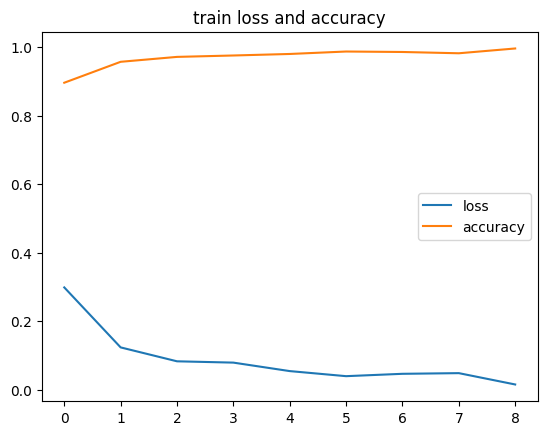

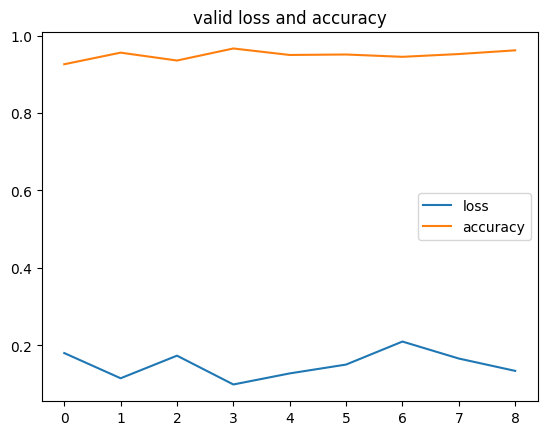

In [17]:
from torch.optim.lr_scheduler import ReduceLROnPlateau

LR = 0.0001
EPOCHS = 20

criterion = torch.nn.CrossEntropyLoss().to(device)
# optimizer정의
optimizer = torch.optim.Adam(model.parameters(), lr=LR)

# scheduler 추가
scheduler = ReduceLROnPlateau(optimizer, mode='min', factor=0.5, patience=3)

# 학습
fit(model, criterion, optimizer, EPOCHS, train_loader, valid_loader, resume=False)

In [18]:
from sklearn.metrics import confusion_matrix, f1_score
import seaborn as sns

def evaluate_model(model, data_loader):
    model.eval()
    total = 0
    correct = 0
    loss_total = 0
    all_targets = []
    all_preds = []

    with torch.no_grad():
        for batch in data_loader:
            # 데이터 로더가 반환하는 값이 여러 개인 경우 처리
            if len(batch) == 2:
                inputs, labels = batch
            elif len(batch) > 2:
                inputs, labels = batch[:2]  # 첫 두 개의 요소만 사용
            else:
                raise ValueError("Unexpected number of elements returned by data_loader.")

            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
            loss_total += loss.item()
            all_targets.extend(labels.cpu().numpy())
            all_preds.extend(predicted.cpu().numpy())

    val_loss = loss_total / len(data_loader)
    val_acc = 100 * correct / total
    val_f1 = f1_score(all_targets, all_preds, average='macro')

    return val_loss, val_acc, val_f1, all_preds, all_targets

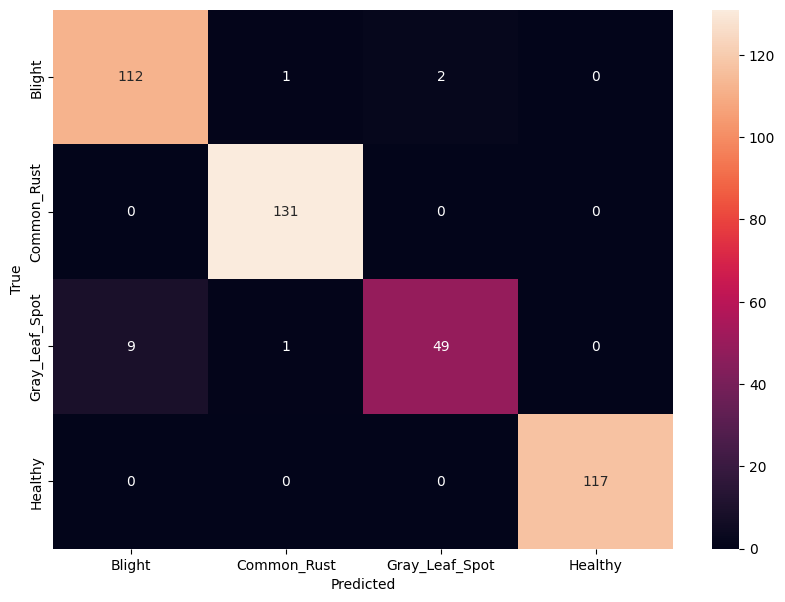

In [19]:
def plot_confusion_matrix(labels, predictions, class_names):
    cm = confusion_matrix(labels, predictions)
    plt.figure(figsize=(10, 7))
    sns.heatmap(cm, annot=True, fmt='d', xticklabels=class_names, yticklabels=class_names)
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()

_, _, _, preds, labels = evaluate_model(model, test_loader)
plot_confusion_matrix(labels, preds, train_data.classes)

In [20]:
import matplotlib.pyplot as plt
from PIL import Image

# 테스트 데이터에서 성능을 평가하고, 예측이 잘못된 이미지를 시각화하는 함수
def evaluate_and_visualize(model, test_loader, criterion):
    # 파란색 ANSI 코드
    blue_color = "\033[34m"
    reset_color = "\033[0m"

    test_loss = 0
    test_correct = 0
    test_total = 0
    #incorrect_images = []
    incorrect_labels = []
    incorrect_preds = []
    incorrect_filenames = []

    model.eval()
    with torch.no_grad():
        for test_x, test_y, filenames in tqdm(test_loader):
            test_x, test_y = test_x.to(device), test_y.to(device)
            outputs = model(test_x)
            loss = criterion(outputs, test_y)
            test_loss += loss.item()
            _, predicted = torch.max(outputs.data, 1)

            # 정확도 계산
            test_correct += (predicted == test_y).sum().item()
            test_total += test_y.size(0)

            if predicted != test_y:
                incorrect_labels.append(test_y.cpu().numpy())
                incorrect_preds.append(predicted.cpu().numpy())
                incorrect_filenames.append(filenames[0])

    test_accuracy = test_correct / test_total
    print("test_correct:{}, test_total:{}".format(test_correct, test_total))
    print('\033[34m'+ 'Train' + '\033[0m' + f' -> Test Loss: {test_loss / len(test_loader):.4f}, Test Accuracy: {test_accuracy * 100:.2f}%')

    print(len(incorrect_filenames))

    # 예측이 잘못된 이미지 시각화
    class_names = ['Blight', 'Common_Rust', 'Gray_Leaf_Spot', 'Healthy']

    fig = plt.figure(figsize=(12, 12))
    for i in range(min(16, len(incorrect_filenames))):
        ax = fig.add_subplot(4, 4, i + 1)
        image = Image.open(incorrect_filenames[i])
        ax.imshow(image)

        # 실제 레이블과 예측 레이블을 클래스 이름으로 변환
        true_label = class_names[int(incorrect_labels[i])]  # 실제 레이블
        pred_label = class_names[int(incorrect_preds[i])]   # 예측 레이블

        # 파일 이름 추출
        filename = os.path.basename(incorrect_filenames[i])
        ax.set_title(f'Pred: {pred_label}, \n Label: {true_label}, {filename}', fontsize=10)
        ax.axis('off')

    plt.tight_layout()
    plt.show()

100%|██████████| 422/422 [00:05<00:00, 76.15it/s] 
<ipython-input-20-cf3bb7f7cba2>:52: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  true_label = class_names[int(incorrect_labels[i])]  # 실제 레이블
<ipython-input-20-cf3bb7f7cba2>:53: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  pred_label = class_names[int(incorrect_preds[i])]   # 예측 레이블


test_correct:409, test_total:422
Train -> Test Loss: 0.1369, Test Accuracy: 96.92%
13


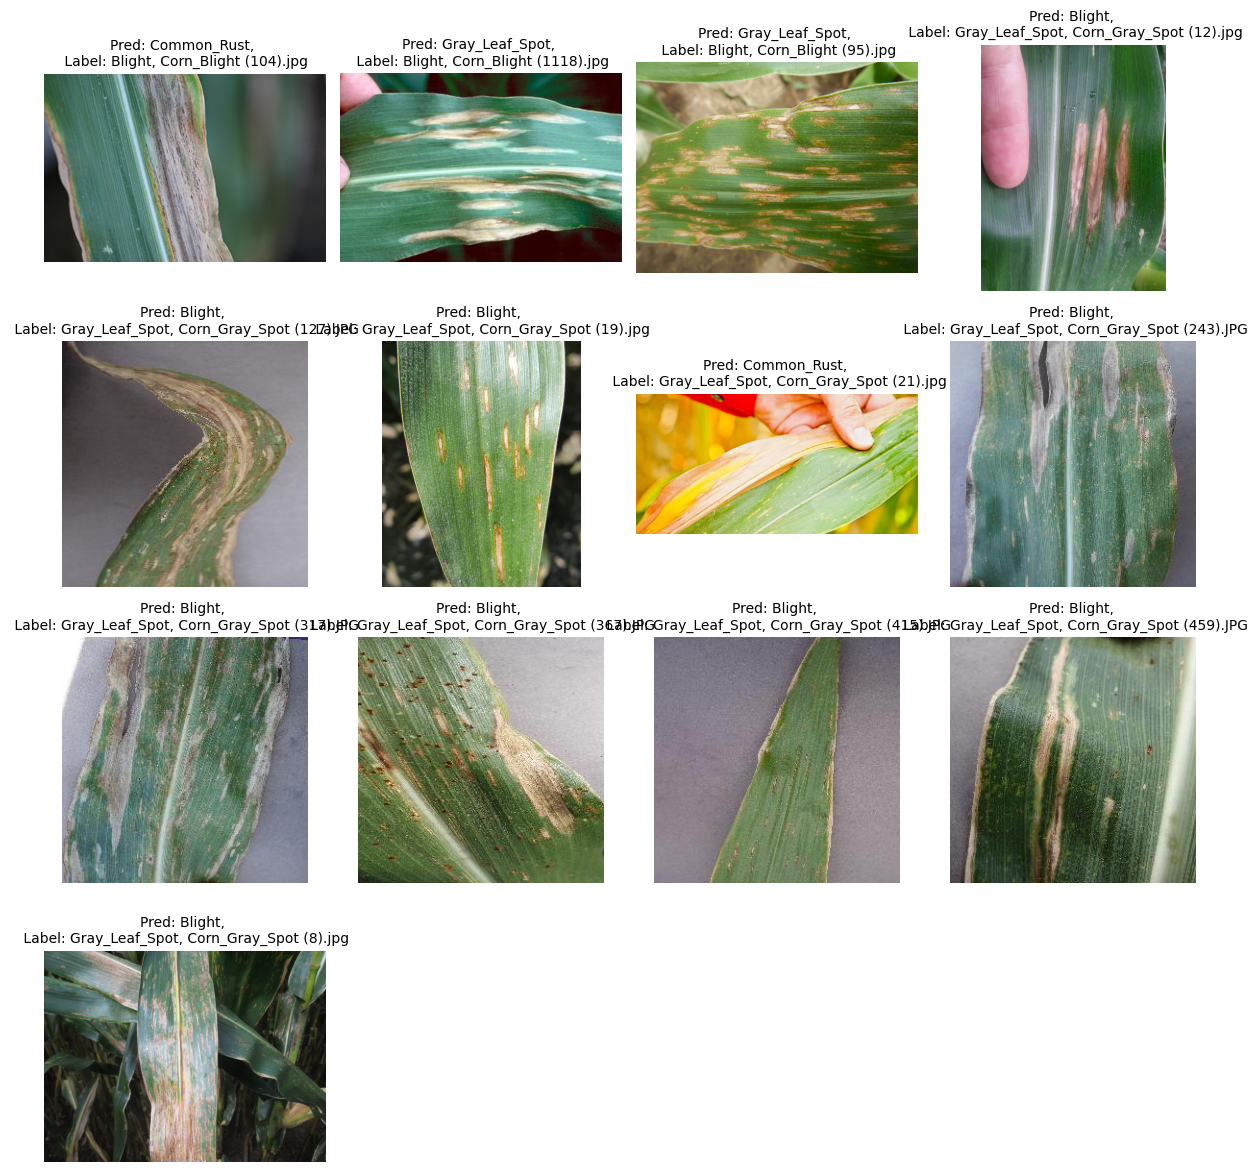

In [21]:
# 테스트 데이터를 통해 성능 평가 및 잘못된 예측 시각화
evaluate_and_visualize(model, test_loader, criterion)